밑바닥부터 시작하는 딥러닝 2
# 3.2 단순한 word2vec

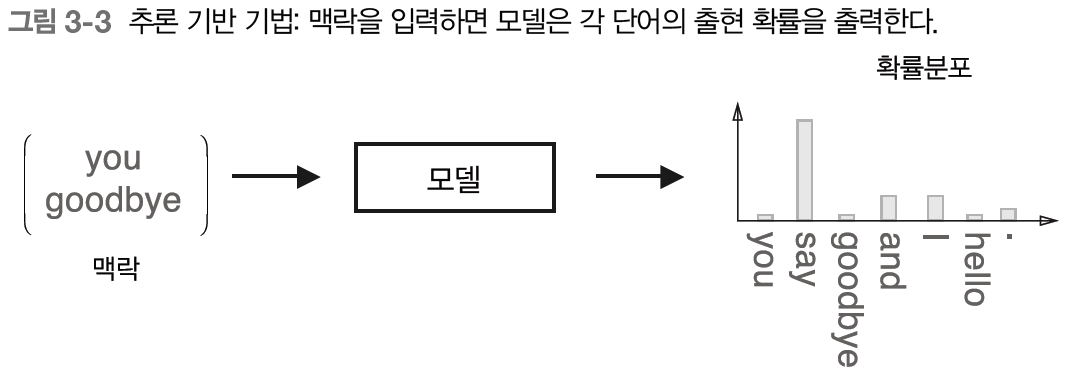

* 모델 구축하기

### CBOW 모델의 추론 처리 Continuous bag-of-words)

* 맥락(input, 원핫으로 변환)으로부터 중앙 단어(target)을 추측하는 신경망

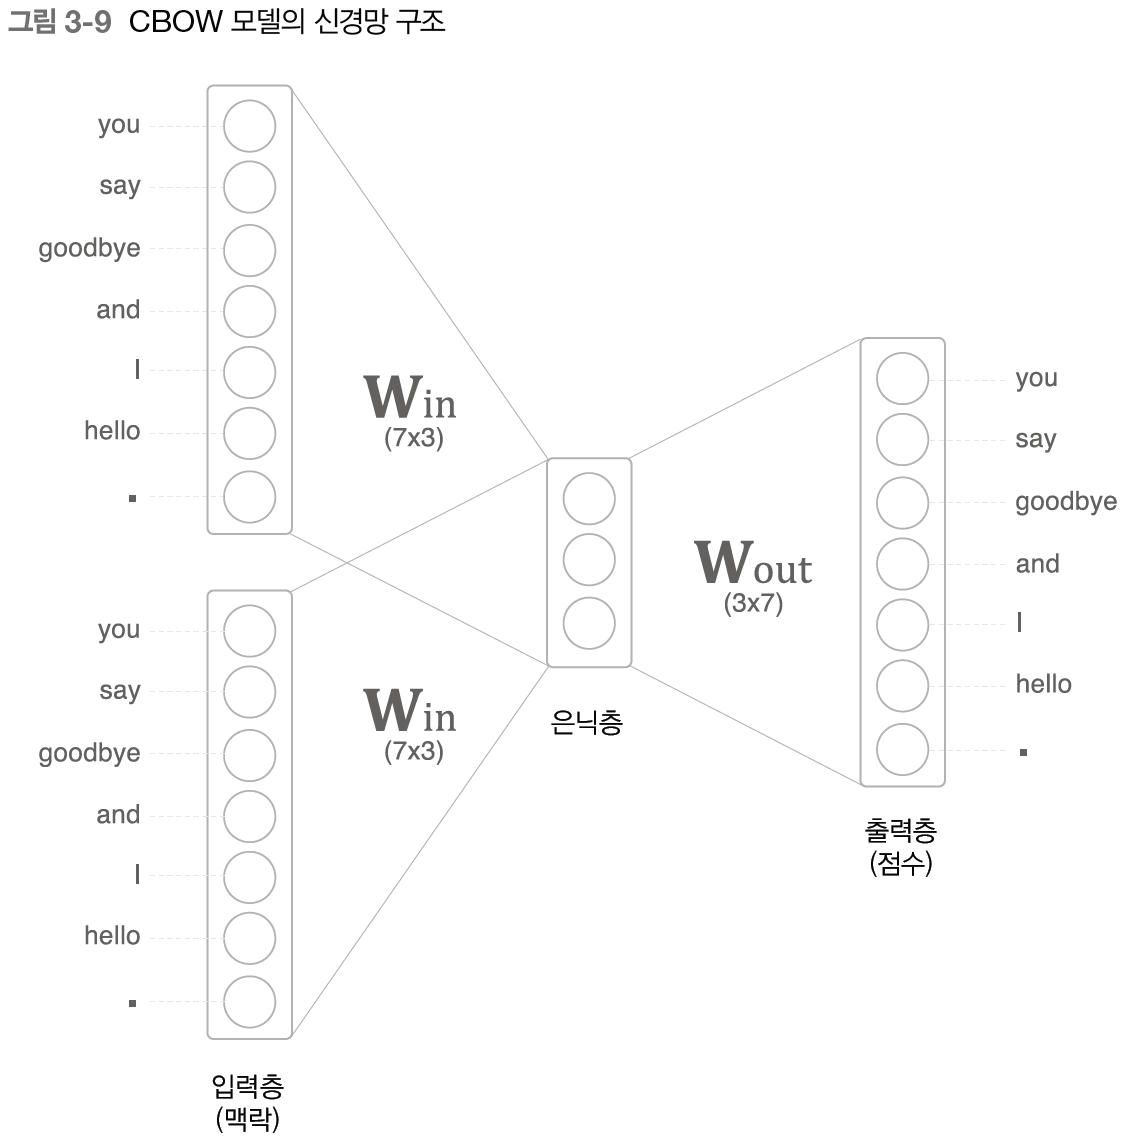

* 맥락에 포함시킬 단어가 N개-> 입력층 N개
* 은닉층의 뉴런은 입력층의 완전연결계층에 의해 변환된 값 (입력층이 여러 개이면 전체를 평균)
* 출력층의 뉴런 하나하나가 각각의 단어에 대응
* 출력층 뉴런은 각 단어의 '점수'를 의미 -> 값이 높을수록 대응 단어의 출현 확률 높아짐-> 점수에 소프트맥스 함수 적용해서 확률 얻을 수 있음

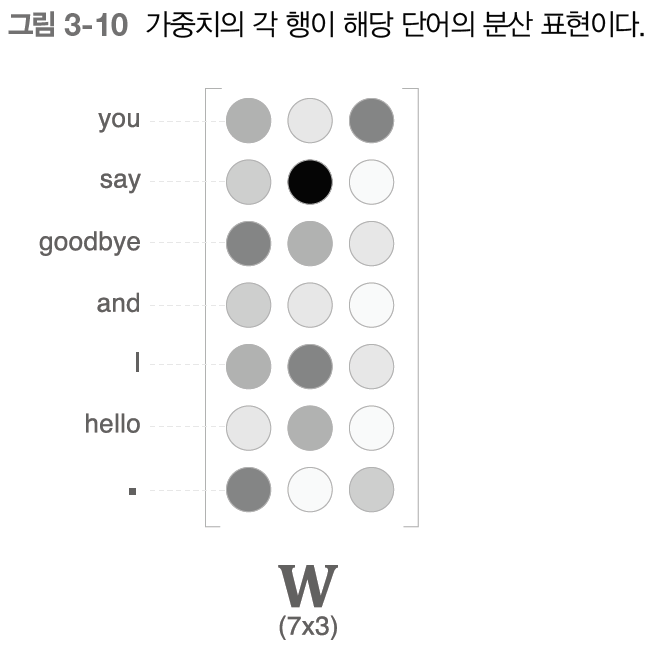

* 흑백이 진할수록 가중치가 큼
* 가중치의 각 행에는 해당 단어의 분산 표현이 담겨 있음 -> 학습을 진행할수록 맥락에서 출현하는 단어를 잘 추측하는 방향으로 분산 표현들이 갱신

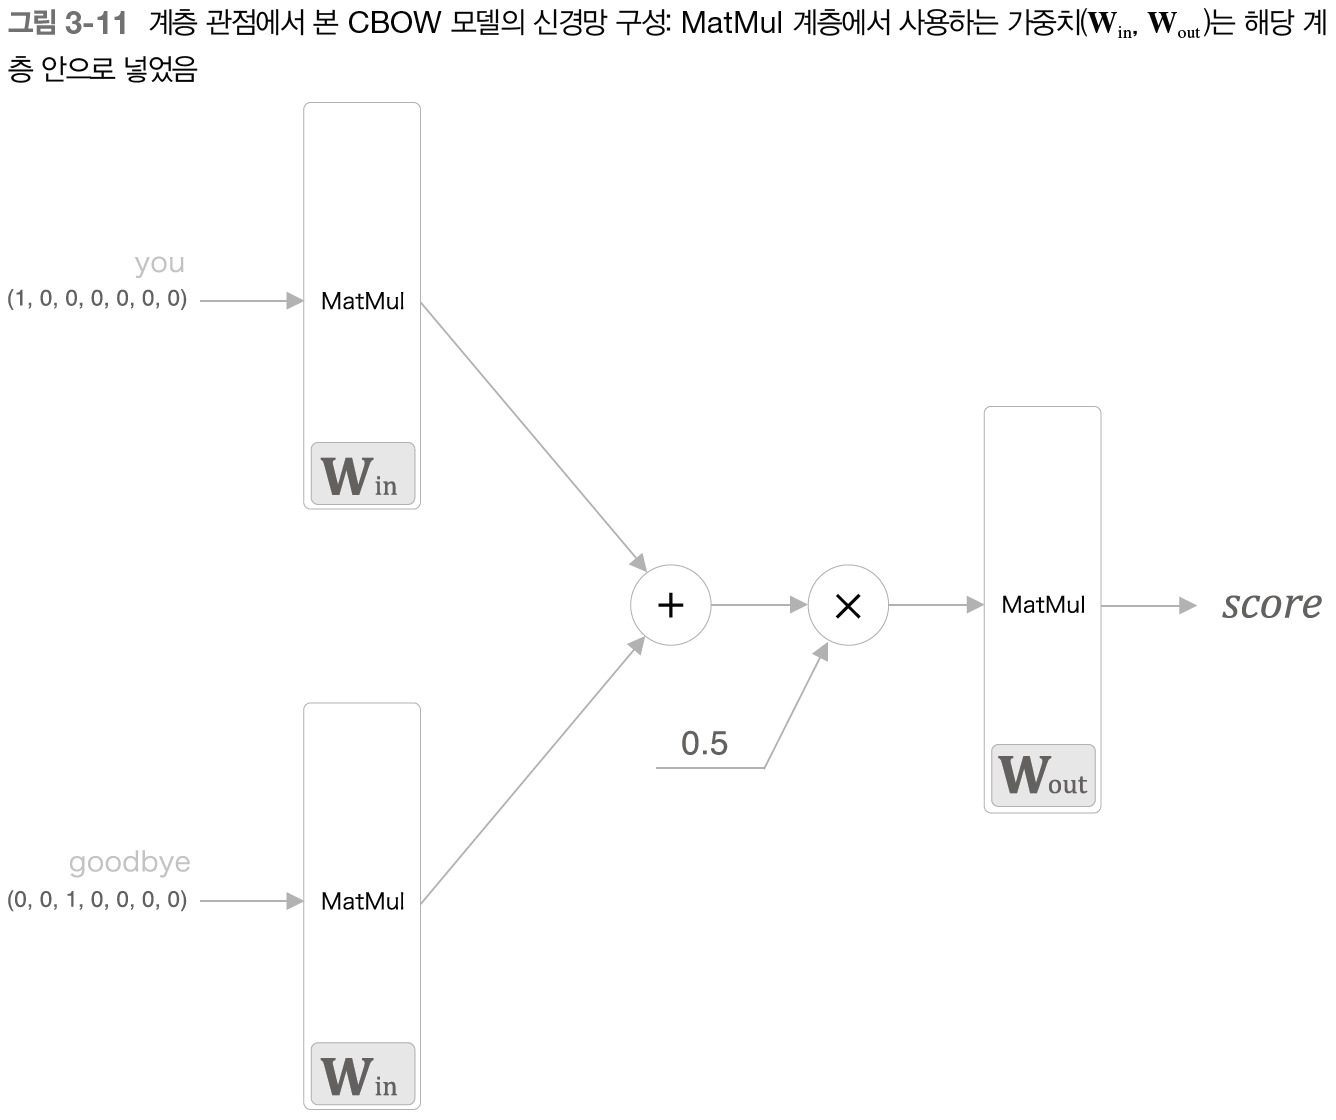

* 두개의 Matmul 계층의 출력이 더해지고 0.5를 곱하면 평균이 되며 은닉층의 뉴런이 됨

In [1]:
import sys
sys.path.append('/Users/sungahwang/Desktop/DL/DLfromScratch2')
import numpy as np
from common.layers import MatMul

In [2]:
# 샘플 맥락 데이타
c0 = np.array([[1, 0, 0, 0, 0, 0, 0]])
c1 = np.array([[0, 0, 1, 0, 0, 0, 0]])

# 가중치 초기화
W_in = np.random.randn(7, 3)
W_out = np.random.randn(3, 7)

# 계층 생성
in_layer0 = MatMul(W_in)
in_layer1 = MatMul(W_in)
out_layer = MatMul(W_out)

# 순전파
h0 = in_layer0.forward(c0)
h1 = in_layer1.forward(c1)
h = 0.5 * (h0 + h1)
s = out_layer.forward(h)

print(s)

[[-0.15963744 -3.24430293  3.03714559 -0.13659528  4.14426897 -0.19656144
  -3.42746243]]


### CBOW 모델의 학습

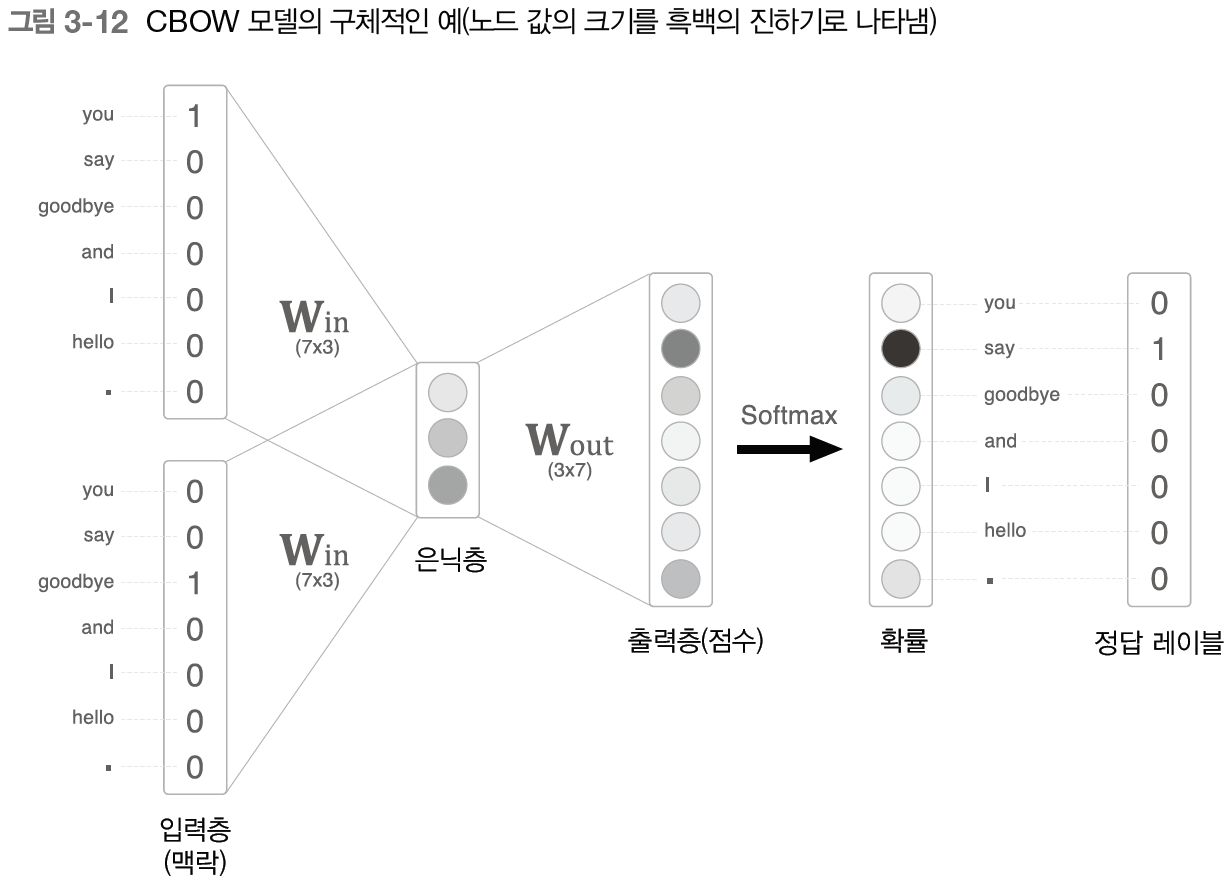

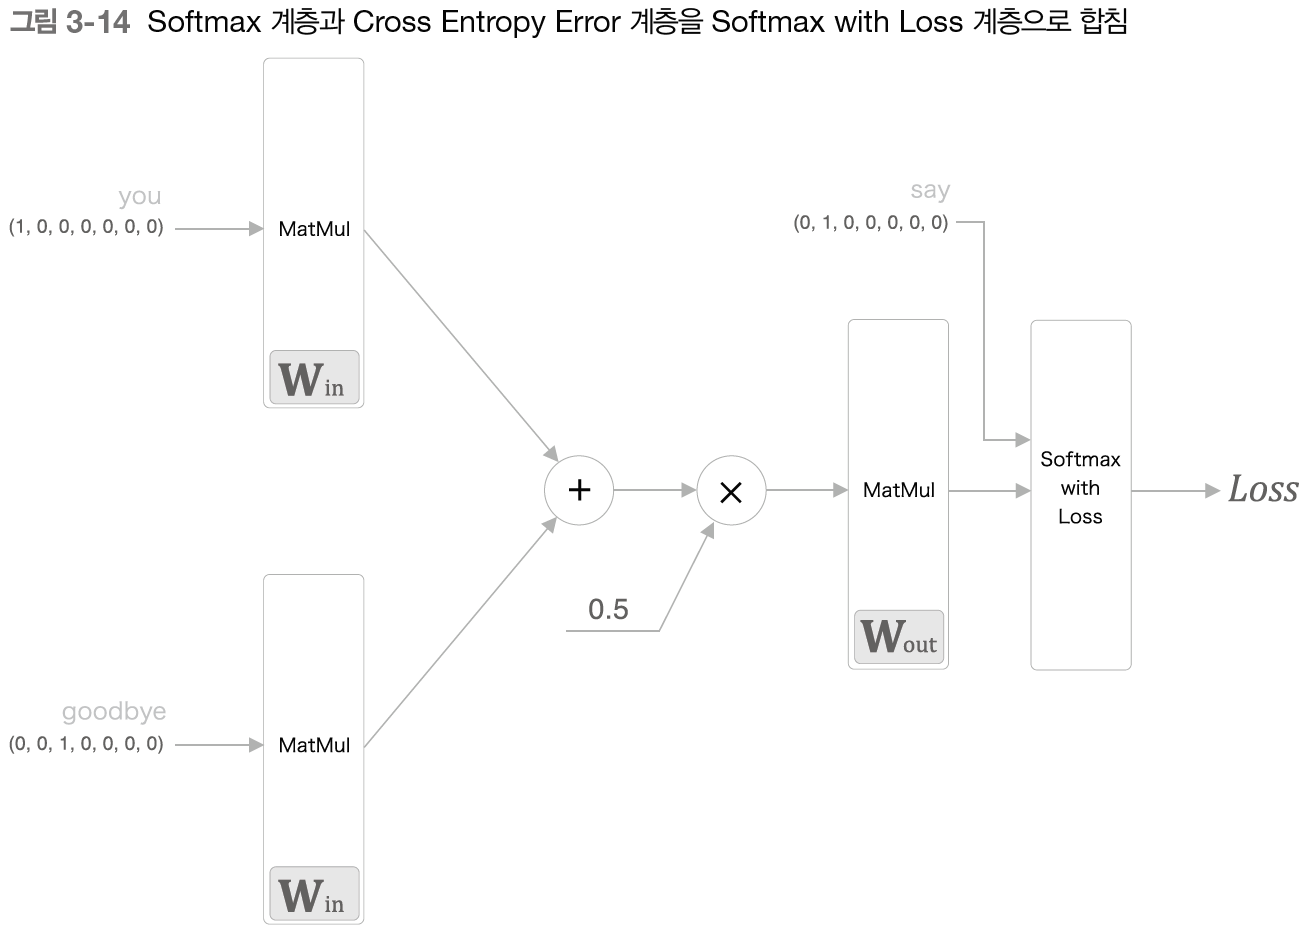

* softmax + cross entropy error = softmax with loss -> 확률과 정답레이블로부터 교차엔트로피를 구한 후 학습을 진행해 손실을 얻을 수 있음

### word2vec의 가중치와 분산 표현

word2vec에서 사용되는 신경망에는 입력 측 가중치, 출력 측 가중치 두 가지가 있음

* 입력 측 가중치: 각 단어의 분산 벡터
* 출력 측 가중치: 단어의 의미가 인코딩 된 벡터가 수직방향으로

입력 측의 가중치만 이용(대중적), 출력 측의 가중치만 이용, 양쪽 가중치 모두 이용(Ex.합치기)